In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression - we have NaNs so this and GB Regressor won't work

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost as xgb

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

# Read, pre-process and visualize data

In [2]:
data_set = pd.read_csv("MultipleSources-2019-2025-Ascending.csv")
data_set.head()

,Date,SP500,Futures,Nikkei,FTSE,DAX
0,04/03/19,"2,873.40","2,879.75","21,713.21","7,418.28","11,954.40"
1,04/04/19,"2,879.39","2,882.75","21,724.95","7,401.94","11,988.01"
2,04/05/19,"2,892.74","2,896.00","21,807.50","7,446.87","12,009.75"
3,04/08/19,"2,895.77","2,898.25","21,761.65","7,451.89","11,963.40"
4,04/09/19,"2,878.20","2,882.50","21,802.59","7,425.57","11,850.57"


In [3]:
len(data_set)
data_set.isna().sum()
data_set.dtypes

1511

Date        0
SP500       0
Futures     0
Nikkei     99
FTSE       30
DAX        24
dtype: int64

Date        object
SP500      float64
Futures    float64
Nikkei     float64
FTSE       float64
DAX        float64
dtype: object

In [4]:
data_set.columns

# Step 1: Ensure the 'Date' column is in datetime format
data_set['Date'] = pd.to_datetime(data_set['Date'], format='%m/%d/%y')

# Step 2: Convert datetime to integer timestamp (in seconds)
data_set['Date'] = data_set['Date'].astype(np.int64) // 10**9

data_set.tail()

scores = {'hybrid':0, 'xg':0, 'dt':0, 'bg':0, 'rf':0, 'hist':0}

Index(['Date', 'SP500', 'Futures', 'Nikkei', 'FTSE', 'DAX'], dtype='object')

,Date,SP500,Futures,Nikkei,FTSE,DAX
1506,1743379200,"5,611.85","5,653.25","35,617.56","8,582.81","22,163.49"
1507,1743465600,"5,633.07","5,674.50","35,624.48","8,634.80","22,539.98"
1508,1743552000,"5,670.97","5,512.00","35,725.87","8,608.48","22,390.84"
1509,1743638400,"5,396.52","5,432.75","33,780.58","8,474.74","21,717.39"
1510,1743724800,"5,074.05","5,110.25",NaN,"8,054.98","20,641.72"


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_set.drop(columns = ['SP500']), data_set['SP500'], test_size=0.2, random_state=50)
X_train
X_test
y_train
y_test

,Date,Futures,Nikkei,FTSE,DAX
1495,1741910400,"5,692.25","37,053.10","8,632.33","22,986.82"
232,1583366400,"3,015.50","21,329.12","6,705.43","11,944.72"
830,1658275200,"3,962.50","27,680.26","7,264.31","13,281.98"
456,1611532800,"3,848.50","28,822.29","6,638.85","13,643.95"
1265,1712880000,"5,167.50","39,523.55","7,995.58","17,930.32"
...,...,...,...,...,...
70,1563148800,"3,017.25",NaN,"7,531.72","12,387.34"
132,1570665600,"2,941.00","21,551.98","7,186.36","12,164.20"
1313,1718928000,"5,471.89","38,596.47","8,237.72","18,163.52"
109,1567987200,"2,978.25","21,318.42","7,235.81","12,226.10"


,Date,Futures,Nikkei,FTSE,DAX
969,1675728000,"4,175.75","27,685.47","7,864.71","15,320.88"
721,1644451200,"4,497.50","27,696.08","7,672.40","15,490.44"
1271,1713744000,"5,047.50","37,438.61","8,023.87","17,860.80"
1234,1709078400,"5,081.00","39,208.03","7,624.98","17,601.22"
1407,1730678400,"5,743.25",NaN,"8,184.24","19,147.85"
...,...,...,...,...,...
1418,1731974400,"5,938.75","38,414.43","8,099.02","19,060.31"
1435,1734048000,"6,055.50","39,470.44","8,300.33","20,405.92"
1237,1709510400,"5,138.25","40,109.23","7,640.33","17,716.17"
501,1617062400,"3,947.75","29,432.70","6,772.12","15,008.61"


1495   5,638.94
232    3,023.94
830    3,959.90
456    3,855.36
1265   5,123.41
         ...   
70     3,014.30
132    2,938.13
1313   5,464.62
109    2,978.43
1504   5,693.31
Name: SP500, Length: 1208, dtype: float64

969    4,164.00
721    4,504.08
1271   5,010.60
1234   5,069.76
1407   5,712.69
         ...   
1418   5,916.98
1435   6,051.09
1237   5,130.95
501    3,958.55
296    3,193.93
Name: SP500, Length: 303, dtype: float64

# Decison tree


In [6]:
clf = DecisionTreeRegressor(random_state=50)

clf = clf.fit(X_train, y_train) 

In [7]:
X_train.columns
clf.feature_importances_

Index(['Date', 'Futures', 'Nikkei', 'FTSE', 'DAX'], dtype='object')

array([4.57128881e-05, 9.99758422e-01, 5.86308238e-05, 1.03027577e-04,
       3.42063398e-05])

In [8]:
test_output = pd.DataFrame(clf.predict(X_test), index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['SP500']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
dt = abs(test_output['pred_spx'] - test_output['SP500']).mean()/test_output['SP500'].mean()

scores['dt'] = mean_absolute_error
scores

,pred_spx,SP500
969,"4,175.48","4,164.00"
721,"4,486.23","4,504.08"
1271,"5,018.39","5,010.60"
1234,"5,069.53","5,069.76"
1407,"5,695.94","5,712.69"


Mean absolute error is 
9.088844884488429


{'hybrid': 0,
 'xg': 0,
 'dt': np.float64(9.088844884488429),
 'bg': 0,
 'rf': 0,
 'hist': 0}

## Bagging Regressor ## 

In [9]:
regr = BaggingRegressor(random_state=50, n_estimators = 200, max_samples = 1000)

regr = regr.fit(X_train, y_train) 

In [10]:
test_output = pd.DataFrame(regr.predict(X_test), index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['SP500']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
bg = abs(test_output['pred_spx'] - test_output['SP500']).mean()/test_output['SP500'].mean()

scores['bg'] = mean_absolute_error

,pred_spx,SP500
969,"4,161.68","4,164.00"
721,"4,485.60","4,504.08"
1271,"5,020.93","5,010.60"
1234,"5,073.75","5,069.76"
1407,"5,706.59","5,712.69"


Mean absolute error is 
8.015044059406495


## Random Forest Regressor 

In [11]:
rf = RandomForestRegressor(random_state=50, min_samples_leaf = 3, max_features = "sqrt")

rf = rf.fit(X_train, y_train) 


In [12]:
X_train.columns
rf.feature_importances_

Index(['Date', 'Futures', 'Nikkei', 'FTSE', 'DAX'], dtype='object')

array([0.28457093, 0.43080921, 0.11360047, 0.04031329, 0.1307061 ])

In [13]:
test_output = pd.DataFrame(rf.predict(X_test), index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['SP500']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
rf = abs(test_output['pred_spx'] - test_output['SP500']).mean()/test_output['SP500'].mean()

scores['rf'] = mean_absolute_error

,pred_spx,SP500
969,"4,142.57","4,164.00"
721,"4,498.50","4,504.08"
1271,"5,048.62","5,010.60"
1234,"5,073.93","5,069.76"
1407,"5,713.27","5,712.69"


Mean absolute error is 
14.01738480138765


## HistGradBoosting Regressor

In [14]:
gb = HistGradientBoostingRegressor(random_state=50, min_samples_leaf = 2, max_depth = 4) #GradientBoostingRegressor(random_state=50, min_samples_leaf = 2, max_depth = 4)

gb = gb.fit(X_train, y_train) 


In [15]:
X_train.columns
#gb.feature_importances_

Index(['Date', 'Futures', 'Nikkei', 'FTSE', 'DAX'], dtype='object')

In [16]:
test_output = pd.DataFrame(gb.predict(X_test), index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['SP500']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
hist = abs(test_output['pred_spx'] - test_output['SP500']).mean()/test_output['SP500'].mean()

scores['hist'] = mean_absolute_error

,pred_spx,SP500
969,"4,160.29","4,164.00"
721,"4,482.04","4,504.08"
1271,"5,008.67","5,010.60"
1234,"5,065.66","5,069.76"
1407,"5,713.52","5,712.69"


Mean absolute error is 
7.6612200627916325


## XGBoost Regressor 

In [17]:
# XGBoost comes with its own class for storing datasets called DMatrix. 
# It is a highly optimized class for memory and speed. 
# That's why converting datasets into this format is a requirement for the native XGBoost API:


# Create regression matrices

dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)

dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [18]:
params = {"objective": "reg:squarederror", "tree_method": "exact", "max_depth" : 4, "learning_rate" : 0.1} # use "tree_method" : "hist" if you need speed

In [19]:
n = 100

model = xgb.train(

   params=params,

   dtrain=dtrain_reg,

   num_boost_round=n,

)

In [20]:
from sklearn.metrics import mean_squared_error
preds = model.predict(dtest_reg)


In [21]:
test_output = pd.DataFrame(preds, index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['SP500']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
xg = abs(test_output['pred_spx'] - test_output['SP500']).mean()/test_output['SP500'].mean()
print(xg)

scores['xg'] = mean_absolute_error
print(scores)

XGBmodel = model # for later use

,pred_spx,SP500
969,"4,159.93","4,164.00"
721,"4,479.68","4,504.08"
1271,"5,018.24","5,010.60"
1234,"5,060.10","5,069.76"
1407,"5,713.11","5,712.69"


Mean absolute error is 
7.278389445389856
0.0017529357041819553
{'hybrid': 0, 'xg': np.float64(7.278389445389856), 'dt': np.float64(9.088844884488429), 'bg': np.float64(8.015044059406495), 'rf': np.float64(14.01738480138765), 'hist': np.float64(7.6612200627916325)}


## Hybrid Model 

In [22]:
model = HistGradientBoostingRegressor(random_state=50, min_samples_leaf = 2, max_depth = 4) #LinearRegression(fit_intercept = True)
model.fit(X_train, y_train) 

# The following gives the R-square score
model.score(X_train, y_train) 

HistGradientBoostingRegressor(max_depth=4, min_samples_leaf=2, random_state=50)

0.9999064538203064

In [23]:
training_residuals = y_train - model.predict(X_train)

In [24]:
rf = RandomForestRegressor(random_state=50, min_samples_leaf = 3, max_features = "sqrt")

rf = rf.fit(X_train, training_residuals) 

In [25]:
pred_residuals = rf.predict(X_test)
y_pred = pred_residuals + model.predict(X_test)

In [26]:
test_output = pd.DataFrame(y_pred, index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['SP500']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
hybrid = abs(test_output['pred_spx'] - test_output['SP500']).mean()/test_output['SP500'].mean()

scores['hybrid'] = mean_absolute_error

,pred_spx,SP500
969,"4,160.03","4,164.00"
721,"4,483.03","4,504.08"
1271,"5,004.19","5,010.60"
1234,"5,072.64","5,069.76"
1407,"5,717.68","5,712.69"


Mean absolute error is 
7.463054618506222


## Plotting a Graph for Comparing Results


{'hybrid': np.float64(7.463054618506222), 'xg': np.float64(7.278389445389856), 'dt': np.float64(9.088844884488429), 'bg': np.float64(8.015044059406495), 'rf': np.float64(14.01738480138765), 'hist': np.float64(7.6612200627916325)}
['hybrid', 'xg', 'dt', 'bg', 'rf', 'hist']
[np.float64(7.463054618506222), np.float64(7.278389445389856), np.float64(9.088844884488429), np.float64(8.015044059406495), np.float64(14.01738480138765), np.float64(7.6612200627916325)]


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Comparison of Mean Absolute Error (MAE) Across Models')

Text(0.5, 0, 'Models')

Text(0, 0.5, 'MAE (lower is better)')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'hybrid'),
  Text(1, 0, 'xg'),
  Text(2, 0, 'dt'),
  Text(3, 0, 'bg'),
  Text(4, 0, 'rf'),
  Text(5, 0, 'hist')])

Text(0.0, 7.963054618506222, '7.46')

Text(1.0, 7.778389445389856, '7.28')

Text(2.0, 9.588844884488429, '9.09')

Text(3.0, 8.515044059406495, '8.02')

Text(4.0, 14.51738480138765, '14.02')

Text(5.0, 8.161220062791632, '7.66')

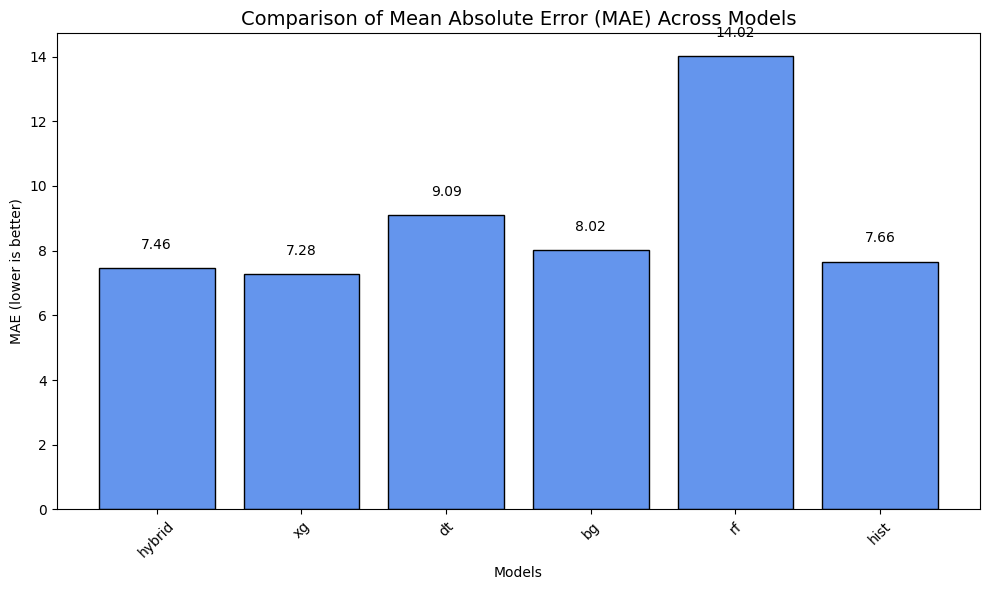

In [27]:
import matplotlib.pyplot as plt
# import pandas as pd

print(scores)

model_names = []
mae = []
for key in scores:
    model_names.append(key)
    mae.append(scores[key])

print(model_names)
print(mae)


# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, mae, color='cornflowerblue', edgecolor='black')
plt.title('Comparison of Mean Absolute Error (MAE) Across Models', fontsize=14)
plt.xlabel('Models')
plt.ylabel('MAE (lower is better)')
plt.xticks(rotation=45)

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [28]:
from datetime import timedelta

data_set['Date'] = pd.to_datetime(data_set['Date'])
data_set.set_index('Date', inplace=True)

data_set['Date'].iloc(-1)

# Feed last N rows into model, get predictions and use those values
# as input for future predictions
# using last 10 rows here
last_known = data_set.iloc[-10:].copy()
predictions = []
prediction_dates = []

# predicting 7 days ahead
for i in range(7):
    # take current last day
    prev_row = last_known.iloc[-1]

    input_df = pd.DataFrame([{
        'Date' : prev_row['Date'],
        #'SP500': prev_row['SP500'],
        'Futures': prev_row['Futures'],
        'Nikkei': prev_row['Nikkei'],
        'FTSE': prev_row['FTSE'],
        'DAX': prev_row['DAX']
    }])

    
    # create DMatrix for XGBoost 
    dmatrix_input = xgb.DMatrix(input_df)

    dmatrix_input
    
    pred = XGBmodel.predict(dmatrix_input)[0]
    predictions.append(pred)

    lastdate = last_known.index[-1]
    new_date =  lastdate + timedelta(days=1)
    dates.append(new_date)

    # Simulate new feature values
    new_row = pd.DataFrame({
        'Date' : new_date,
        #'SP500': [pred], 
        'Futures': [futures], 
        'Nikkei': [nikkei], 
        'FTSE': [ftse], 
        'DAX': [dax]}, 
        index=[new_date])

    # Append the new prediction to last_known for the next iteration
    last_known = pd.concat([last_known, new_row])


# Plot only the predicted S&P 500 prices
plt.figure(figsize=(10, 5))
plt.plot(dates, predictions, marker='o', linestyle='-', color='blue', label='Predicted S&P 500')
plt.title('Predicted S&P 500 Closing Prices for Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Close Price')
plt.grid(True)
plt.legend()
plt.show()

# Output predictions
for date, price in zip(dates, predictions):
    print(f"{date.date()}: ${price:.2f}")


KeyError: 'Date'